In [19]:
from reinforcement_training import *
from notebook_game_helper import *
from keras.models import load_model

In [20]:
# lets train a DQN model!
# make the model
hiddens = [{"size":100,"activation":"relu"},
           {"size":20,"activation":"relu"}]
#            {"size":100,"activation":"relu"},
#           {"size":100,"activation":"relu"}]
# make an optimizer
from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
# optimizer = sgd(lr = 0.0001)
# optimizer_str = "SGD"
# optimizer = Adagrad()
# optimizer_str = "Adagrad"
# optimizer = RMSprop()
# optimizer_str = "RMSprop"
# optimizer = Adadelta()
# optimizer_str = "Adadelta"
optimizer = Adam()
optimizer_str = "Adam"
# model = baseline_model(optimizer, hiddens, ipt_mode = 3, opt_mode = 1)
model = load_model("guided_rl_model_wide.h5")

In [21]:
training_game_size_x = 40
training_game_size_y = 30

training_game = HybridNaviGame(training_game_size_y,
                                training_game_size_x,
                                model,
                                tolerance = 5)
training_game.setup()

In [4]:
training_game.Navigator.strategy.mode = 3

In [8]:
training_episodes = 10000
steps = 10
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps,
                e_start = .9,
                e_stop = .1)

Episode 9999, Replay Loss: 0.107: 100%|██████████| 10000/10000 [36:28<00:00,  3.16it/s]  


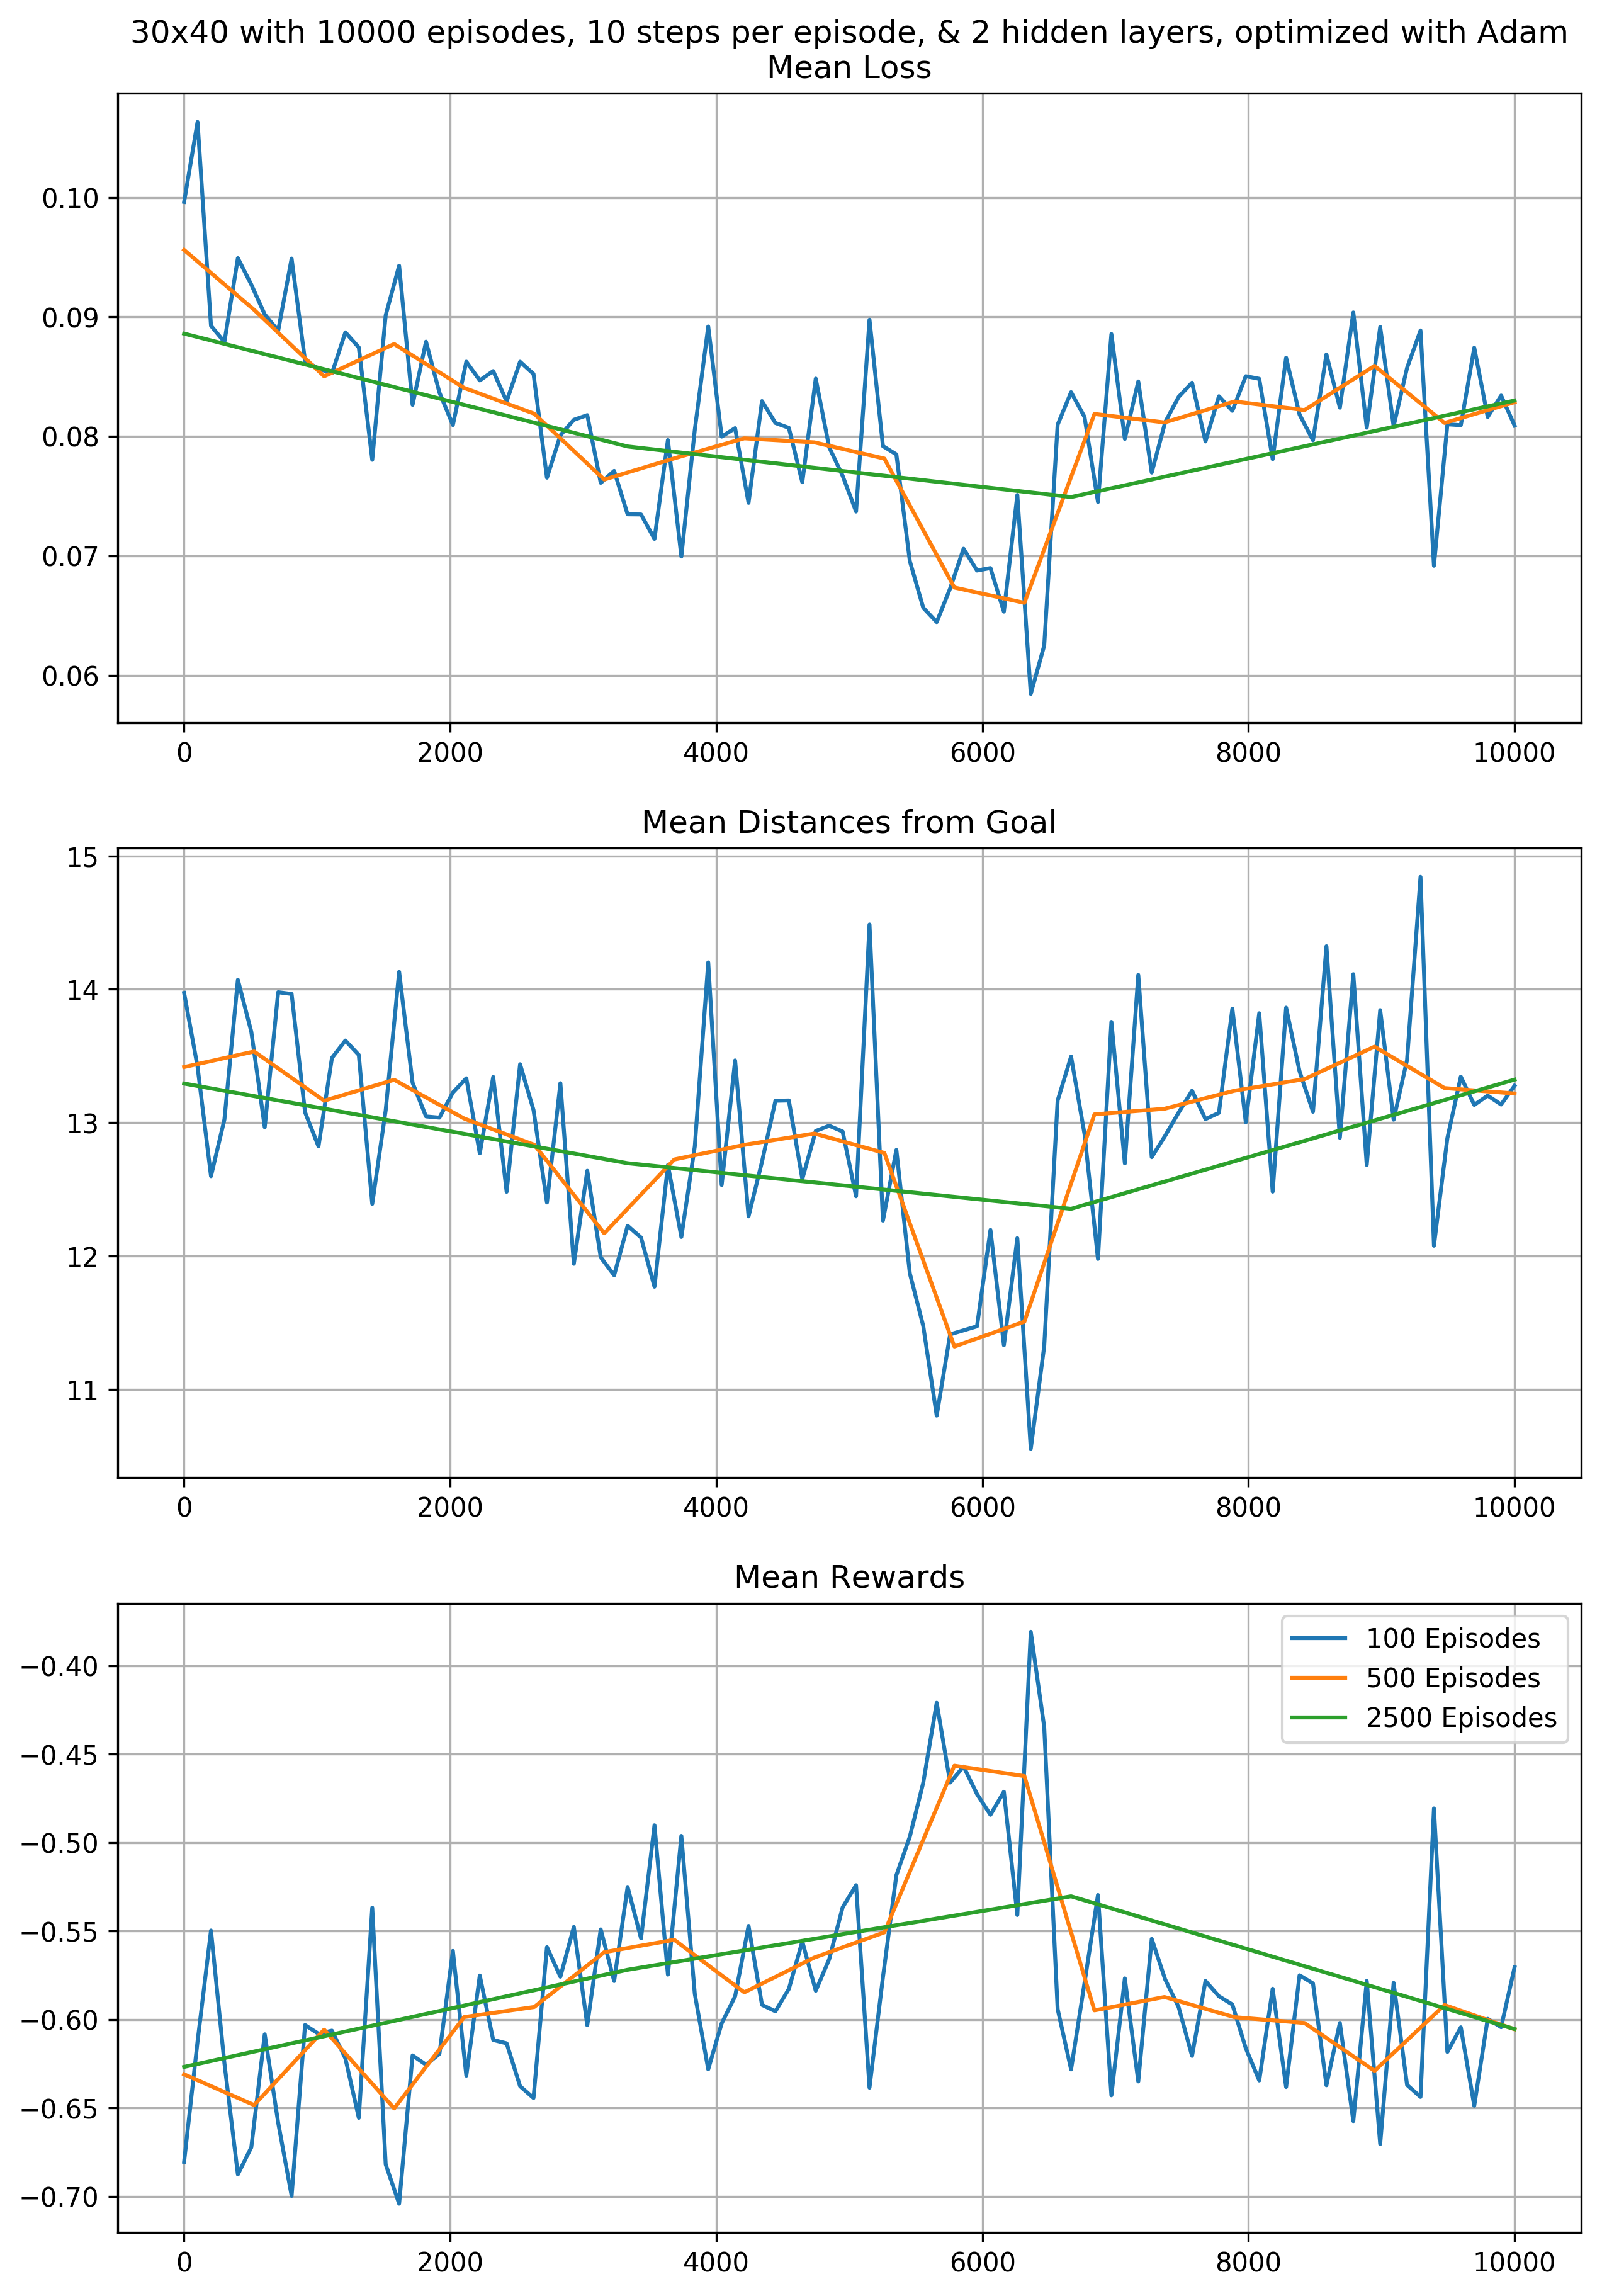

In [9]:
# plot learning info
title_str = str(training_game_size_y) + "x" + str(training_game_size_x) + " with " 
title_str += str(training_episodes) + " episodes, " + str(steps) + " steps per episode, & "
title_str += str(len(hiddens)) + " hidden layers, optimized with " + optimizer_str + "\n"
f, axarr = pl.subplots(3, 1, figsize = (10, 15), dpi = 300)

for _, k in enumerate([100, 500, 2500]):
    mean_step = k
    mean_rewards = []
    mean_dists = []
    mean_loss = []
    num_means = int(len(output['distances'])/mean_step/steps)
    steps_per_mean = steps*mean_step
    x = np.linspace(0, training_episodes, num_means)
    for i in range(num_means):
        mean_r = 0
        mean_d = 0
        mean_l = 0
        for j in range(steps_per_mean):
            mean_r += output['rewards'][j + i * steps_per_mean]
            mean_d += output['distances'][j + i * steps_per_mean]
            mean_l += output['loss'][j + i * steps_per_mean]
        mean_r = mean_r / steps_per_mean
        mean_d = mean_d / steps_per_mean
        mean_l = mean_l / steps_per_mean
        mean_rewards.append(mean_r)
        mean_dists.append(mean_d)
        mean_loss.append(mean_l)
    label = str(mean_step) + " Episodes"
    axarr[0].plot(x, mean_loss, label = label)
    axarr[1].plot(x, mean_dists, label = label)
    axarr[2].plot(x, mean_rewards, label = label)

axarr[0].grid(True)
axarr[0].set_title(title_str + 'Mean Loss') 
axarr[1].grid(True)
axarr[1].set_title('Mean Distances from Goal')
axarr[2].grid(True)
axarr[2].set_title('Mean Rewards')
f.subplots_adjust(hspace=0.2)

# axarr[1].plot(x, output['replays'])
# axarr[1].set_title('Replay Loss')
# axarr[2].plot(x2, output['reward_totals'])
# axarr[2].set_title('Total Reward')
# axarr[2].plot(x2, output['distances'])
# axarr[2].set_title('Distance from Goal')

file_str = str(training_game_size_y) + "x" + str(training_game_size_x) + "_" 
file_str += str(training_episodes) + "_" + str(steps) + "_" + str(len(hiddens))
file_str += "_" + optimizer_str
pl.legend()
pl.plot()
pl.savefig("hybrid_plots" + file_str + "_2.png")
pl.show()

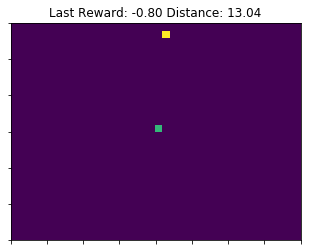

None

In [14]:
animate_game(training_game, n = 1, save = True)

In [16]:
model.save("guided_rl_model_wide.h5")

In [ ]:
training_game.Navigator.move(7, 7, False)

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = "images/"
filenames = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

import imageio
images = []
for filename in filenames[1:]:
    images.append(imageio.imread(filename))
imageio.mimsave('images/gifs/trained_guided_rl_3.gif', images)

In [15]:
training_game.Navigator.strategy.plan_movement()

4